In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg
from matplotlib import patches

## Q1. Re-visit pset 1, and get covariance error ellipse

In [104]:
file = pd.read_csv(r"data.txt", delimiter='\s+', header = None)
x = file.iloc[:,0][4:]
y = file.iloc[:,1][4:]
sigma_y = file.iloc[:,2][4:]
sigma_x = file.iloc[:,3][4:]
rho_xy = file.iloc[:,4][4:]

#### Get covariance matrix

In [105]:
#we need to construct the following matrices: X, Y, C^-1, and solve for Theta

def get_unc_matrix(x,y,sigma_y):

    dim = len(x)
    X = np.ones((dim,2))
    X[:,0] = x
    Y = y
    
    C_inv = np.zeros((dim, dim))
    var_inv = [1/s**2 for s in sigma_y]
    np.fill_diagonal(C_inv, var_inv)

    info_inv = np.matmul(np.matmul(np.transpose(X), C_inv), X) #information inverse matrix
    info = np.linalg.solve(info_inv, np.identity(2)) #solve(a,b) solves equation for x: Ax = b

    proj = np.matmul(np.matmul(np.transpose(X), C_inv), Y) #projection matrix

    Theta = np.matmul(info, proj)

    unc_matrix = np.linalg.solve(np.matmul(np.matmul(np.transpose(X), C_inv), X), np.identity(2))
    
    return unc_matrix

#### Get ellipse parameters

Covariance matrix = [[ 1.16166311e-02 -1.88954491e+00]
 [-1.88954491e+00  3.32922601e+02]] 



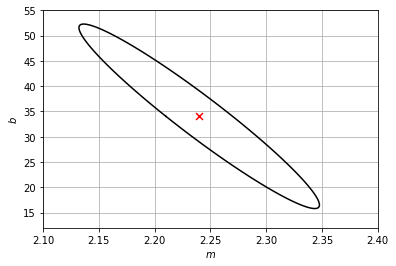

In [124]:
unc_matrix = get_unc_matrix(x,y,sigma_y)
print('Covariance matrix = {}'.format(unc_matrix), '\n')
eigval, eigvec = linalg.eig(unc_matrix)

#semi major and semi minor radii are square roots of eigenvalues.
r1 = np.sqrt(np.real(eigval[0]))
r2 = np.sqrt(np.real(eigval[1]))

#the orientation of the ellipse is the angle (lambda1-a/b), where covar matrix is [a b; b c]
a = unc_matrix[0][0]
b = unc_matrix[1][0]
c = unc_matrix[1][1]
alpha = np.arctan2(np.real(eigval[0])-a, b)

trange = np.linspace(0,2*np.pi,100)
x_ellipse = [r1*np.cos(alpha)*np.cos(t) - r2*np.sin(alpha)*np.sin(t) for t in trange]
y_ellipse = [r1*np.sin(alpha)*np.cos(t) + r2*np.cos(alpha)*np.sin(t) for t in trange]

#plot datapoint along with its uncertainty
fig, ax = plt.subplots()
ax.set_ylabel(r'$b$')
ax.set_xlabel(r'$m$')

m, intercept = 2.24, 34.05 #MLE estimates
x_ellipse = [x_ellipse[i] + m for i in range(len(x_ellipse))]
y_ellipse = [y_ellipse[i] + intercept for i in range(len(y_ellipse))]

_= ax.plot(x_ellipse, y_ellipse, 'k-')
#_= ax.plot([m+np.sqrt(a), m-np.sqrt(a)], [intercept-np.sqrt(c), intercept+np.sqrt(c)], 'b-', alpha = 0.4)
_= ax.scatter(m, intercept, s = 48, marker = 'x', c='red')

ax.set_xlim([2.1,2.4])
ax.set_ylim([12,55])
ax.grid()